# Machine Learning Project - Clients satisfaction prediction model

## Overview

1. Discovery
2. Exploratory Data Analysis
    1. Encoding categorical features
    2. Missing values
    3. Features e target
    4. Classes distribution
    5. Features correlation
    6. Choose the proper metric
3. Baseline Model
4. Feature Engineering
    1. Feature scaling
    2. Outliers detection
    3. Resampling
5. Model on all features
    1. Spot-check
    2. Model tuning
    3. Model testing
6. Features selection
    1. Grouping numerical features
    2. Chi-square test
    3. Mutual information
    4. Select best features
7. Model on selected features
    1. Spot-Check
    2. Model tuning
    3. Model testing
8. Model optimization
    1. Recursive Feature Elimination
    2. Model testing
9. Conclusion

## Discovery

Import all necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV

pd.set_option('display.max_columns', None)

Import train and test datasets.

In [2]:
train = pd.read_csv('final_project_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
test = pd.read_csv('final_project_test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Exploratory Data Analysis

Use the 'id' column as the index and remove the 'Unnamed' column which is just a copy of the index.

In [5]:
train = train.set_index('id')
test = test.set_index('id')

train = train.sort_values(by='id')
test = test.sort_values(by='id')

train = train.drop(columns='Unnamed: 0')
test = test.drop(columns='Unnamed: 0')

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,satisfied


### Encoding categorical features

Use the Ordinal Encoder to transform the values in the columns:
* satisfaction
* Gender
* Customer Type
* Class
* Type of Travel

In [6]:
cat = ['neutral or dissatisfied', 'satisfied']

enc = OrdinalEncoder(categories=[cat])

train['satisfaction'] = enc.fit_transform(train[['satisfaction']]).astype(int)
test['satisfaction'] = enc.transform(test[['satisfaction']]).astype(int)

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,0
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,1
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,1
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,1
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,1


In [7]:
cat = ['Female', 'Male']

enc = OrdinalEncoder(categories=[cat])

train['Gender'] = enc.fit_transform(train[['Gender']]).astype(int)
test['Gender'] = enc.transform(test[['Gender']]).astype(int)

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,0
2,0,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,1
3,1,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,1
4,1,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,1
5,0,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,1


In [8]:
cat = ['disloyal Customer', 'Loyal Customer']

enc = OrdinalEncoder(categories=[cat])

train['Customer Type'] = enc.fit_transform(train[['Customer Type']]).astype(int)
test['Customer Type'] = enc.fit_transform(test[['Customer Type']]).astype(int)

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,0
2,0,1,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,1
3,1,1,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,1
4,1,1,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,1
5,0,1,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,1


Transform the values of 'Class' into 0, 1, and 2 with the Ordinal Encoder because there is a logical order among the classes:
* Economy Class: lowest ticket cost with lower service
* Economy Plus Class: higher cost compared to Economy and better service
* Business Class: class with the highest service and cost

In [9]:
cat = ['Eco', 'Eco Plus', 'Business']

enc = OrdinalEncoder(categories=[cat])

train['Class'] = enc.fit_transform(train[['Class']]).astype(int)
test['Class'] = enc.transform(test[['Class']]).astype(int)

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,48,Business travel,2,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,0
2,0,1,35,Business travel,2,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,1
3,1,1,41,Business travel,2,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,1
4,1,1,50,Business travel,2,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,1
5,0,1,49,Business travel,2,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,1


In [10]:
cat = ['Personal Travel', 'Business travel']

enc = OrdinalEncoder(categories=[cat])

train['Type of Travel'] = enc.fit_transform(train[['Type of Travel']]).astype(int)
test['Type of Travel'] = enc.transform(test[['Type of Travel']]).astype(int)

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,48,1,2,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,0
2,0,1,35,1,2,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,1
3,1,1,41,1,2,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,1
4,1,1,50,1,2,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,1
5,0,1,49,1,2,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,1


### Missing values

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    103904 no

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25976 entries, 17 to 129877
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int32  
 1   Customer Type                      25976 non-null  int32  
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  int32  
 4   Class                              25976 non-null  int32  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int64 

The feature 'Arrival Delay in Minutes' is the only one with missing values in both the training and test sets.

The column contains the arrival delay in minutes for flights, so I expect a high correlation with the departure delay in minutes.

I draw a scatter plot to check if this high correlation is actually present.

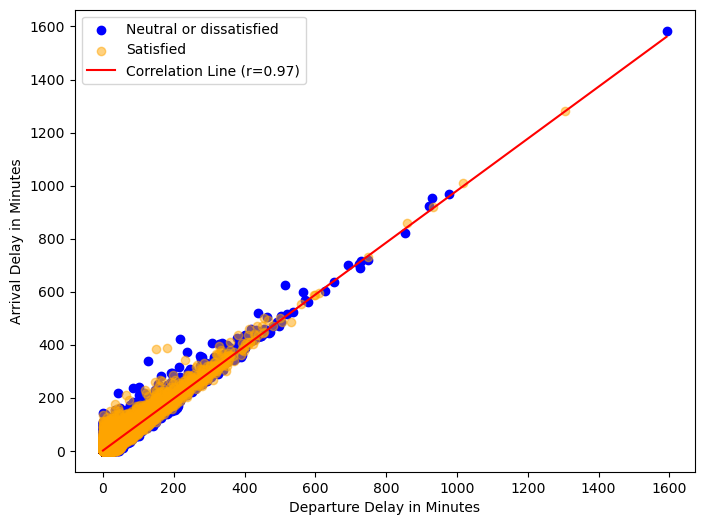

In [13]:
a = train.dropna()[['Departure Delay in Minutes', 'satisfaction']]
b = train.dropna()[['Arrival Delay in Minutes', 'satisfaction']]

plt.figure(figsize=(8, 6))

plt.scatter(
    a[a['satisfaction']==0]['Departure Delay in Minutes'],
    b[b['satisfaction']==0]['Arrival Delay in Minutes'],
    label='Neutral or dissatisfied',
    color='blue',
    alpha=1
)
plt.scatter(
    a[a['satisfaction']==1]['Departure Delay in Minutes'],
    b[b['satisfaction']==1]['Arrival Delay in Minutes'],
    label='Satisfied',
    color='orange',
    alpha=0.5
)

corr_coef = np.corrcoef(a['Departure Delay in Minutes'], b['Arrival Delay in Minutes'])[0, 1]

plt.plot(
    np.unique(a['Departure Delay in Minutes']),
    np.poly1d(np.polyfit(a['Departure Delay in Minutes'], b['Arrival Delay in Minutes'], 1))(np.unique(a['Departure Delay in Minutes'])),
    color='red',
    label='Correlation Line (r={:.2f})'.format(corr_coef)
)

plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.legend()

plt.show()

The scatter plot confirms the high correlation between the two features, so I decide to impute the missing values in 'Arrival Delay in Minutes' with the corresponding values in 'Departure Delay in Minutes'.

Then I check if all the values in 'Arrival Delay in Minutes' are integers, and if so, I change the column type to 'int'.

In [14]:
for i in train.index:
    if pd.isnull(train.loc[i, 'Arrival Delay in Minutes']):
        train.loc[i, 'Arrival Delay in Minutes'] = train.loc[i, 'Departure Delay in Minutes']

for i in test.index:
    if pd.isnull(test.loc[i, 'Arrival Delay in Minutes']):
        test.loc[i, 'Arrival Delay in Minutes'] = test.loc[i, 'Departure Delay in Minutes']

integers = 0
floats = 0
nulls = 0

for i in train.index:
    if train.loc[i, 'Arrival Delay in Minutes'] % 1 == 0:
        integers += 1
    elif pd.isnull(train.loc[i, 'Arrival Delay in Minutes']):
        nulls += 1
    else:
        floats += 1
print('train: {} integers, {} floats, {} nulls'.format(integers, floats, nulls))

integers = 0
floats = 0
nulls = 0

for i in test.index:
    if test.loc[i, 'Arrival Delay in Minutes'] % 1 == 0:
        integers += 1
    elif pd.isnull(test.loc[i, 'Arrival Delay in Minutes']):
        nulls += 1
    else:
        floats += 1
print('test: {} integers, {} floats, {} nulls'.format(integers, floats, nulls))

train: 103904 integers, 0 floats, 0 nulls
test: 25976 integers, 0 floats, 0 nulls


I have all integers, so I change the column type.

In [15]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].astype(int)
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].astype(int)

train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,48,1,2,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5,0
2,0,1,35,1,2,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39,1
3,1,1,41,1,2,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0,1
4,1,1,50,1,2,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0,1
5,0,1,49,1,2,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1,1


### Features e target

Split the DataFrame in features (x) and target (y).

In [16]:
x_train = train.drop(columns='satisfaction', axis=1)
y_train = train['satisfaction']

x_test = test.drop(columns='satisfaction', axis=1)
y_test = test['satisfaction']

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((103904, 22), (103904,), (25976, 22), (25976,))

### Classes distribution

Check if classes are balanced.

satisfaction
0    58879
1    45025
Name: count, dtype: int64


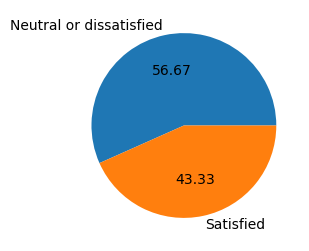

In [17]:
print(y_train.value_counts())

plt.figure(figsize=(3,3))
plt.pie(y_train.value_counts(), labels=['Neutral or dissatisfied', 'Satisfied'], autopct='%.2f')
plt.show()

The most prevalent class is 'neutral or dissatisfied' with 56.67% of the records, indicating a class imbalance issue.

### Features correlation

I draw the correlation matrix to check for cases of collinearity.

   Very strong  Strong  Moderate  Weak  Very weak
0            1       7        17    38        190


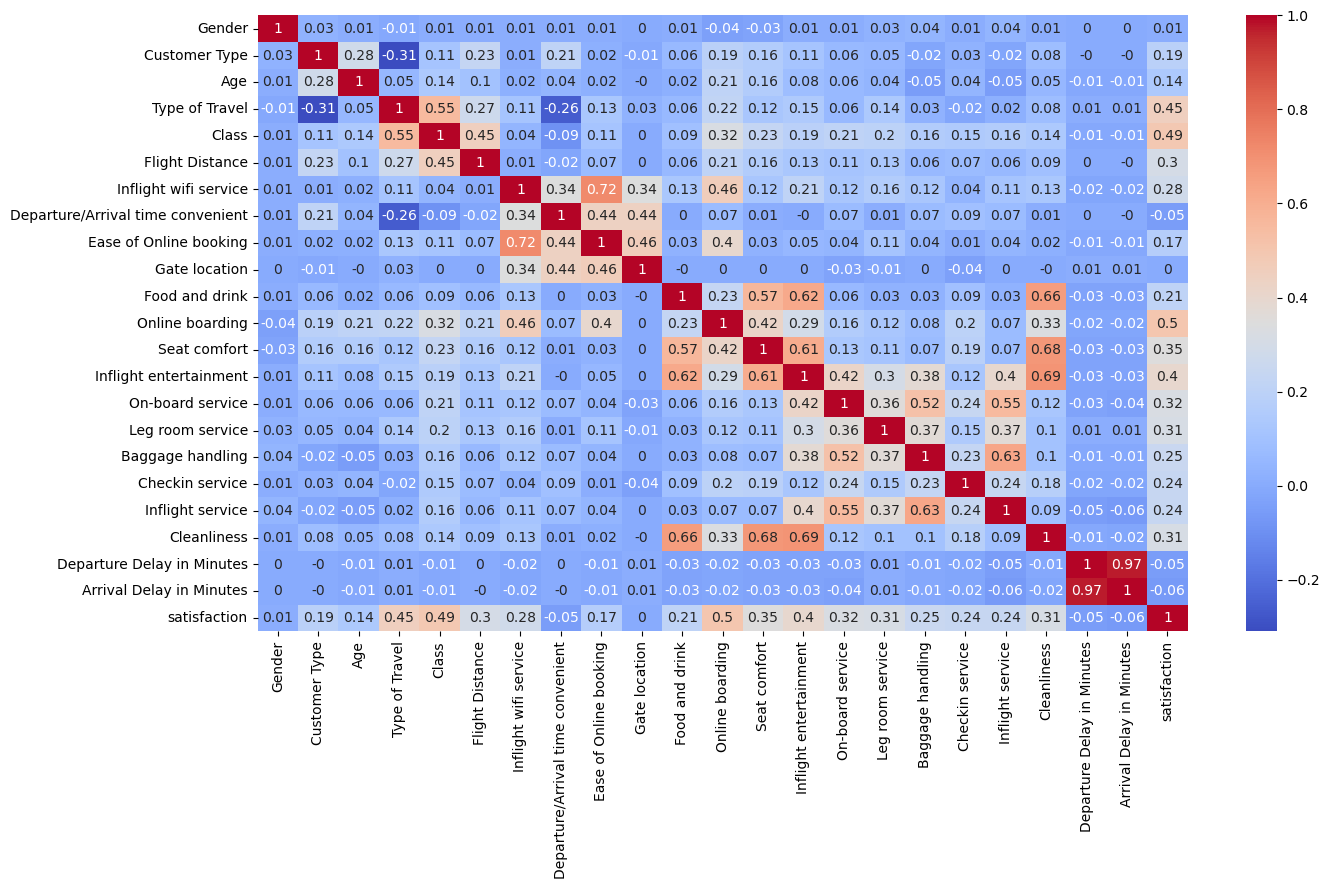

In [18]:
train = x_train.join(y_train)

correlation_matrix = train.corr()

correlation_matrix_test = correlation_matrix.apply(pd.to_numeric).round(2)

very_strong = 0
strong = 0
moderate = 0
weak = 0
very_weak = 0 

for row in correlation_matrix_test.index:
    for col in correlation_matrix_test.columns:
        if correlation_matrix_test.loc[row, col] != 1:
            if correlation_matrix_test.loc[row, col] >= 0.8 or correlation_matrix_test.loc[row, col] <= -0.8:
                very_strong += 0.5
            elif correlation_matrix_test.loc[row, col] >= 0.6 or correlation_matrix_test.loc[row, col] <= -0.6:
                strong += 0.5
            elif correlation_matrix_test.loc[row, col] >= 0.4 or correlation_matrix_test.loc[row, col] <= -0.4:
                moderate += 0.5
            elif correlation_matrix_test.loc[row, col] >= 0.2 or correlation_matrix_test.loc[row, col] <= -0.2:
                weak += 0.5
            else:
                very_weak += 0.5

table = pd.DataFrame([[int(very_strong), int(strong), int(moderate), int(weak), int(very_weak)]],
                     columns=['Very strong', 'Strong', 'Moderate', 'Weak', 'Very weak'])
print(table)

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm')
plt.show()

Only one pair has a very strong correlation (>= 0.8):
* Departure Delay / Arrival Delay: 0.97
* 
Seven pairs are strong (0.6 / 0.79), of which:
* Three include the feature: Cleanliness
* All are pairs between two of the 14 features that contain ratings from 1 to 5 on the services offered

The other pairs are all weaker:
* 17 moderate pairs (0.4 / 0.59)
* 38 weak pairs (0.2 / 0.39)
* 190 very weak pairs (0 / 0.19)

Additionally, I note that the target variable 'satisfaction' has only 4 moderate pairs, while all the others are weak or very weak.

### Choose the proper metric

There are several metrics that can be relevant to evaluate the performance of a binary classification model.

The most common ones are:
* Accuracy:
    * It is calculated as the ratio of the total number of correct predictions (TP + TN) to the total number of instances.
    * Accuracy = (TP + TN) / (TP + TN + FP + FN)
* Precision:
    * It is calculated as the ratio of the number of true positives (TP) to the sum of true positives and false positives (FP).
    * Precision = TP / (TP + FP)
* Recall (True Positive Rate):
    * It is calculated as the ratio of the number of true positives (TP) to the sum of true positives and false negatives (FN).
    * Recall = TP / (TP + FN)
* F1-Score:
    * It is useful when you want to find a balance between precision and recall.
    * F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
* Specificity (True Negative Rate):
    * It is calculated as the ratio of the number of true negatives (TN) to the sum of true negatives and false positives (FP).
    * Specificity = TN / (TN + FP)
* ROC-AUC (Area Under the Receiver Operating Characteristic Curve):
    * Represents the true positive rate (recall) versus the false positive rate as the model's decision threshold varies.
    * This metric takes into account all decision thresholds and provides an assessment of the model's discriminatory ability.
* Precision-Recall Curve:
    * Shows the trade-off between precision and recall as the model's decision threshold varies.
    * The area under the curve provides a measure of the model's predictive ability on imbalanced classes.

To evaluate the goodness of the models in this project, I use the accuracy.

## Baseline Model

I use a Logistic Regression model to get a base score.

Bagging model accuracy on test set: 0.78696


C:\Users\Stefano\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


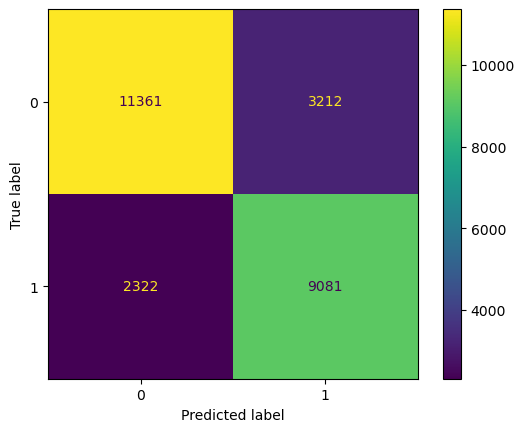

In [19]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

predictions = lr.predict(x_test)

score = accuracy_score(predictions, y_test)
print('Bagging model accuracy on test set: {:.5f}'.format(score))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

It results in an accuracy of 78.7% on the test set, with a similar accuracy on the two classes.

## Feature Engineering

### Feature scaling

Scale the features in the range {0, 1} using the MinMaxScaler.

In [20]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)

x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_train.columns)

x_train.describe().round(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.00,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000
mean,0.493,0.817,0.415,0.690,0.514,0.234,0.546,0.612,0.551,0.595,0.640,0.65,0.688,0.672,0.676,0.670,0.658,0.661,0.728,0.657,0.009,0.010
std,0.500,0.386,0.194,0.463,0.481,0.201,0.266,0.305,0.280,0.256,0.266,0.27,0.264,0.267,0.258,0.263,0.295,0.253,0.235,0.262,0.024,0.025
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,0.256,0.000,0.000,0.077,0.400,0.400,0.400,0.400,0.400,0.40,0.400,0.400,0.400,0.400,0.500,0.600,0.600,0.400,0.000,0.000
50%,0.000,1.000,0.423,1.000,0.500,0.164,0.600,0.600,0.600,0.600,0.600,0.60,0.800,0.800,0.800,0.800,0.750,0.600,0.800,0.600,0.000,0.000
75%,1.000,1.000,0.564,1.000,1.000,0.346,0.800,0.800,0.800,0.800,0.800,0.80,1.000,0.800,0.800,0.800,1.000,0.800,1.000,0.800,0.008,0.008
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Outliers detection

To detect outliers, I use the Isolation Forest algorithm.

By setting contamination='auto', the Isolation Forest identifies almost 50% of the records as outliers. Therefore, I manually set contamination=0.2.

In [21]:
# identify outliers
iso = IsolationForest(contamination=0.2, random_state=0)
out = iso.fit_predict(x_train)

# select rows that are not outliers
mask = out == 1
x_train, y_train = x_train.loc[mask, :], y_train.loc[mask]

x_train.shape, y_train.shape

C:\Users\Stefano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


((83123, 22), (83123,))

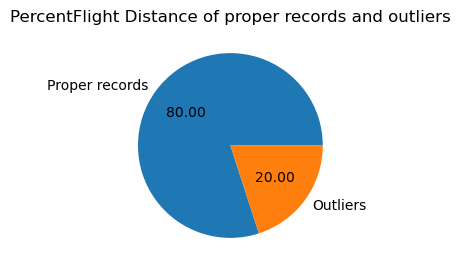

In [22]:
plt.figure(figsize=(3, 3))
plt.pie([len(x_train), 103904-len(x_train)], labels=['Proper records', 'Outliers'], autopct='%.2f')
plt.title('PercentFlight Distance of proper records and outliers')
plt.show()

### Resampling

I check the class balance situation after removing outliers, and if there's class imbalance, I perform a resampling.

satisfaction
0    45029
1    38094
Name: count, dtype: int64


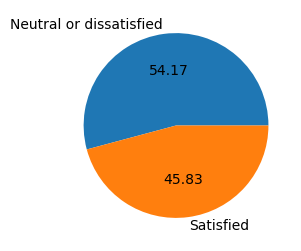

In [23]:
print(y_train.value_counts())

plt.figure(figsize=(3, 3))
plt.pie(y_train.value_counts(), labels=['Neutral or dissatisfied', 'Satisfied'], autopct='%.2f')
plt.show()

The classes are still imbalanced, so I use the SMOTE method to perform oversampling on the minority class.

satisfaction
0    45029
1    45029
Name: count, dtype: int64


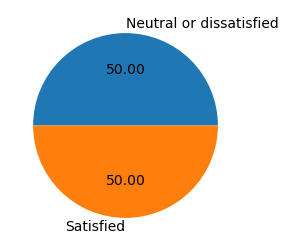

In [24]:
sm = SMOTE(sampling_strategy='not majority', random_state=0)

x_train, y_train = sm.fit_resample(x_train, y_train)

print(y_train.value_counts())

plt.figure(figsize=(3, 3))
plt.pie(y_train.value_counts(), labels=['Neutral or dissatisfied', 'Satisfied'], autopct='%.2f')
plt.show()

## Model on all features

#### Spot-check

For the Spot-Check, I use a linear model, a non-linear model, and an ensemble model to see which of these options works best and then use it for the final model.

I use the following models:
* Linear model
    * Logistic Regression
* Non-linear model
    * K Nearest Neighbors
* Ensemble model
    * Random Forest

In [25]:
def define_models(models=dict()):
    # linear model
    models['logistic'] = LogisticRegression()
    # non-linear model
    models['knn'] = KNeighborsClassifier()
    # ensemble model
    models['rf'] = RandomForestClassifier()
    print('Defined {} models'.format(len(models)))
    return models

In [26]:
def evaluate_models(x, y, models):
    results=dict()
    for name, model in models.items():
        scores = cross_val_score(model, x, y, scoring='accuracy', cv=5, n_jobs=-1)
        if scores is not None:
            results[name] = scores
            mean_score, std_score = np.mean(scores), np.std(scores)
            print('>{}: {:.3f} (+/-{:.3f})'.format(name, mean_score, std_score))
        else:
            print('>{}: error'.format(name))
    return results

In [27]:
def summarize_results(results):
    if len(results) == 0:
        print('no results')
        return
    n = min(10, len(results))
    mean_scores = [(k, np.mean(v)) for k,v in results.items()]
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    mean_scores = list(reversed(mean_scores))
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = np.mean(results[name]), np.std(results[name])
        print('Rank={}, Name={}, Score={:.3f} (+/-{:.3f})'.format(i+1, name, mean_score, std_score))
    plt.boxplot(scores, labels=names)
    plt.xticks(rotation='vertical', ha='center')

Defined 3 models
>logistic: 0.889 (+/-0.015)
>knn: 0.937 (+/-0.014)
>rf: 0.961 (+/-0.009)

Rank=1, Name=rf, Score=0.961 (+/-0.009)
Rank=2, Name=knn, Score=0.937 (+/-0.014)
Rank=3, Name=logistic, Score=0.889 (+/-0.015)


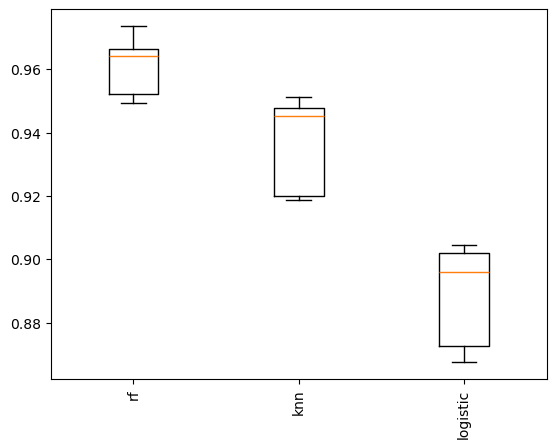

In [28]:
models = define_models()

results = evaluate_models(x_train, y_train, models)

summarize_results(results)


"The Random Forest model achieves the best result, therefore I proceed with the analysis using an ensemble model.

Given the excellent result obtained by the Random Forest model in the Spot Check, I decide to continue the analysis using this moel."

#### Model tun
I search for the best parameters for the model using Random Search, which is more efficient than Grid Search when I need to evaluate many parameters.

For the Random Search, I choose the following parameters:
* n_estimators
    * number of trees in the Random Forest
    * default = 100
    * iterate between 100 and 300 with a step of 20
* min_samples_split
    * minimum number of samples required to split a node
    * default = 2 = minimum value for the model to work
    * iterate from the minimum value (2) up to 5
* min_samples_leaf
    * minimum number of samples required to be at a leaf node (output)
    * default = 1 = minimum value for the model to work
    * iterate from the minimum value (1) up to 5
* max_depth
    * maximum depth of the trees, if =None the nodes will expand until all leaves are pure or contain fewer values than min_samples_leaf
    * default = None
    * iterate over None and between 10 and 50 with a step of 10, reducing the possible values of max_depth may not yield the ideal result but will significantly reduce execution times

By doing so, I obtain a total of 10 x 4 x 5 x 5 = 1,000 possible combinations. For Random Search, I set 100 iterations to test one combination every 10.i 10

In [29]:
param_grid = [{
    'n_estimators' : np.arange(100, 301, 20),
    'min_samples_split' : np.arange(2, 6, 1),
    'min_samples_leaf' : np.arange(1, 6, 1),
    'max_depth' : np.arange(10, 51, 10)
}]

optimal_params = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                                    param_grid,
                                    n_iter=100,
                                    cv=5,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    random_state=0)

optimal_params.fit(x_train, y_train.values.ravel())

print(optimal_params.best_params_)

print(optimal_params.best_score_)

{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 40}
0.9613806071802076


#### Model Testing

Now that I have the optimal parameters, I check the model's performance on the test set.

RF model accuracy on test set: 0.96173


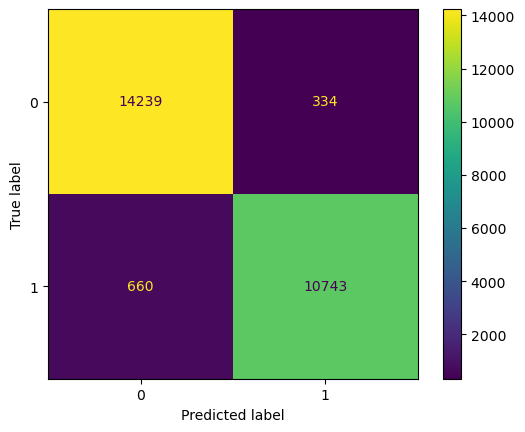

In [30]:
rf = RandomForestClassifier(n_estimators=300,
                           min_samples_split=4,
                           min_samples_leaf=1,
                           max_depth=40,
                           random_state=0)

rf.fit(x_train, y_train)

predictions = rf.predict(x_test)

score = accuracy_score(predictions, y_test)
print('RF model accuracy on test set: {:.5f}'.format(score))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The model achieves an accuracy of 96.17%, with 97.71% on the 'neutral or dissatisfied' class, which is the majority class, and 94.21% on the 'satisfied' class.

## Features selection

To increase the effectiveness of the model, I try selecting 4/5 features to run the model on. Using fewer features makes the model faster and simplifies the data collection process since we can achieve the same results with less data.

To select the features, I use the Chi-Square test and Mutual Information.

In the previously displayed correlation matrix, I noticed that all features have a medium-low correlation with the target variable 'satisfaction,' so I expect poor results from a model that uses few features.

### Grouping numerical features

The Chi-Square test does not work very well on continuous variables, so I group the continuous variables to make them discrete.

I use the pandas.qcut method on the training set and the cut method on the test set with the same boundaries between groups.

I divide the values of 'Age' into 11 groups.

In [31]:
x_train['Age_cut'], bin_edges = pd.qcut(x_train['Age'], q=11, labels=np.arange(0, 1.1, 0.1), retbins=True)
x_test['Age_cut'] = pd.cut(x_test['Age'], bins=bin_edges, labels=np.arange(0, 1.1, 0.1), include_lowest=True)

x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age_cut
0,1.0,0.0,0.525641,1.0,1.0,0.159532,0.6,0.6,0.6,0.6,1.0,0.6,1.0,1.0,0.6,0.4,1.0,0.8,1.0,1.0,0.001256,0.003157,0.7
1,0.0,1.0,0.358974,1.0,1.0,0.159532,0.4,0.4,0.4,0.4,0.6,1.0,0.8,1.0,1.0,1.0,1.0,0.6,1.0,1.0,0.016332,0.024621,0.3
2,1.0,1.0,0.435897,1.0,1.0,0.165994,0.8,0.8,0.8,0.8,1.0,1.0,1.0,0.6,0.6,0.6,0.5,0.8,0.6,1.0,0.000000,0.000000,0.5
3,1.0,1.0,0.551282,1.0,1.0,0.378433,0.4,0.4,0.4,0.4,0.8,0.8,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.8,0.000000,0.000000,0.7
4,0.0,1.0,0.538462,1.0,1.0,0.694467,0.6,0.6,0.6,0.6,0.8,1.0,0.8,0.6,0.6,0.8,0.5,0.6,0.6,1.0,0.000000,0.000631,0.7


I divide the values of 'Flight Distance' into 9 groups.

In [32]:
x_train['Flight_distance_cut'], bin_edges = pd.qcut(x_train['Flight Distance'], q=9, labels=np.arange(0, 1.125, 0.125), retbins=True)
x_test['Flight_distance_cut'] = pd.cut(x_test['Flight Distance'], bins=bin_edges, labels=np.arange(0, 1.125, 0.125), include_lowest=True)

x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age_cut,Flight_distance_cut
0,1.0,0.0,0.525641,1.0,1.0,0.159532,0.6,0.6,0.6,0.6,1.0,0.6,1.0,1.0,0.6,0.4,1.0,0.8,1.0,1.0,0.001256,0.003157,0.7,0.50
1,0.0,1.0,0.358974,1.0,1.0,0.159532,0.4,0.4,0.4,0.4,0.6,1.0,0.8,1.0,1.0,1.0,1.0,0.6,1.0,1.0,0.016332,0.024621,0.3,0.50
2,1.0,1.0,0.435897,1.0,1.0,0.165994,0.8,0.8,0.8,0.8,1.0,1.0,1.0,0.6,0.6,0.6,0.5,0.8,0.6,1.0,0.000000,0.000000,0.5,0.50
3,1.0,1.0,0.551282,1.0,1.0,0.378433,0.4,0.4,0.4,0.4,0.8,0.8,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.8,0.000000,0.000000,0.7,0.75
4,0.0,1.0,0.538462,1.0,1.0,0.694467,0.6,0.6,0.6,0.6,0.8,1.0,0.8,0.6,0.6,0.8,0.5,0.6,0.6,1.0,0.000000,0.000631,0.7,1.00


The values in the 'Departure Delay in Minutes' feature are highly imbalanced and concentrated around 0 and values close to 0.

Therefore, in the qcut method, I include duplicates='drop'. This way, when it creates 2 groups with the same limit, it merges them.

I run a test to see how many classes are created and then assign the labels accordingly.

In [33]:
departure_qcut = pd.qcut(
    x_train['Departure Delay in Minutes'],
    q=6,
    duplicates='drop'
)

departure_qcut.value_counts()

Departure Delay in Minutes
(-0.001, 0.00188]    60345
(0.00188, 0.0101]    15040
(0.0101, 0.127]      14673
Name: count, dtype: int64

Using q=6, three classes are created, so I set three labels.

In [34]:
x_train['Departure_delay_cut'], bin_edges = pd.qcut(
    x_train['Departure Delay in Minutes'],
    q=6,
    labels=[0, 0.5, 1],
    retbins=True,
    duplicates='drop'
)
x_test['Departure_delay_cut'] = pd.cut(
    x_test['Departure Delay in Minutes'],
    bins=bin_edges,
    labels=[0, 0.5, 1],
    include_lowest=True,
    duplicates='drop'
)

x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age_cut,Flight_distance_cut,Departure_delay_cut
0,1.0,0.0,0.525641,1.0,1.0,0.159532,0.6,0.6,0.6,0.6,1.0,0.6,1.0,1.0,0.6,0.4,1.0,0.8,1.0,1.0,0.001256,0.003157,0.7,0.50,0.0
1,0.0,1.0,0.358974,1.0,1.0,0.159532,0.4,0.4,0.4,0.4,0.6,1.0,0.8,1.0,1.0,1.0,1.0,0.6,1.0,1.0,0.016332,0.024621,0.3,0.50,1.0
2,1.0,1.0,0.435897,1.0,1.0,0.165994,0.8,0.8,0.8,0.8,1.0,1.0,1.0,0.6,0.6,0.6,0.5,0.8,0.6,1.0,0.000000,0.000000,0.5,0.50,0.0
3,1.0,1.0,0.551282,1.0,1.0,0.378433,0.4,0.4,0.4,0.4,0.8,0.8,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.8,0.000000,0.000000,0.7,0.75,0.0
4,0.0,1.0,0.538462,1.0,1.0,0.694467,0.6,0.6,0.6,0.6,0.8,1.0,0.8,0.6,0.6,0.8,0.5,0.6,0.6,1.0,0.000000,0.000631,0.7,1.00,0.0


I follow the same process for 'Arrival Delay in Minutes'.

In [35]:
arrival_qcut = pd.qcut(
    x_train['Arrival Delay in Minutes'],
    q=6,
    duplicates='drop'
)

departure_qcut.value_counts()

Departure Delay in Minutes
(-0.001, 0.00188]    60345
(0.00188, 0.0101]    15040
(0.0101, 0.127]      14673
Name: count, dtype: int64

In [36]:
x_train['Arrival_delay_cut'], bin_edges = pd.qcut(
    x_train['Arrival Delay in Minutes'],
    q=6,
    labels=[0, 0.5, 1],
    retbins=True,
    duplicates='drop'
)
x_test['Arrival_delay_cut'] = pd.cut(
    x_test['Arrival Delay in Minutes'],
    bins=bin_edges,
    labels=[0, 0.5, 1],
    include_lowest=True,
    duplicates='drop'
)

x_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Age_cut,Flight_distance_cut,Departure_delay_cut,Arrival_delay_cut
0,1.0,0.0,0.525641,1.0,1.0,0.159532,0.6,0.6,0.6,0.6,1.0,0.6,1.0,1.0,0.6,0.4,1.0,0.8,1.0,1.0,0.001256,0.003157,0.7,0.50,0.0,0.5
1,0.0,1.0,0.358974,1.0,1.0,0.159532,0.4,0.4,0.4,0.4,0.6,1.0,0.8,1.0,1.0,1.0,1.0,0.6,1.0,1.0,0.016332,0.024621,0.3,0.50,1.0,1.0
2,1.0,1.0,0.435897,1.0,1.0,0.165994,0.8,0.8,0.8,0.8,1.0,1.0,1.0,0.6,0.6,0.6,0.5,0.8,0.6,1.0,0.000000,0.000000,0.5,0.50,0.0,0.0
3,1.0,1.0,0.551282,1.0,1.0,0.378433,0.4,0.4,0.4,0.4,0.8,0.8,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.8,0.000000,0.000000,0.7,0.75,0.0,0.0
4,0.0,1.0,0.538462,1.0,1.0,0.694467,0.6,0.6,0.6,0.6,0.8,1.0,0.8,0.6,0.6,0.8,0.5,0.6,0.6,1.0,0.000000,0.000631,0.7,1.00,0.0,0.0


### Chi-square test

I use the Chi-Square test to determine the importance of the features.

In [37]:
chi_values, p_values = chi2(x_train, y_train)

chi_scores = pd.DataFrame({'chi_values': chi_values, 'p_values': p_values}, index=x_train.columns)

chi_scores.head()

,chi_values,p_values
Gender,3.073785,7.956404e-02
Customer Type,660.209904,1.344883e-145
Age,254.387292,2.870800e-57
Type of Travel,6635.758867,0.000000e+00
Class,11012.452463,0.000000e+00


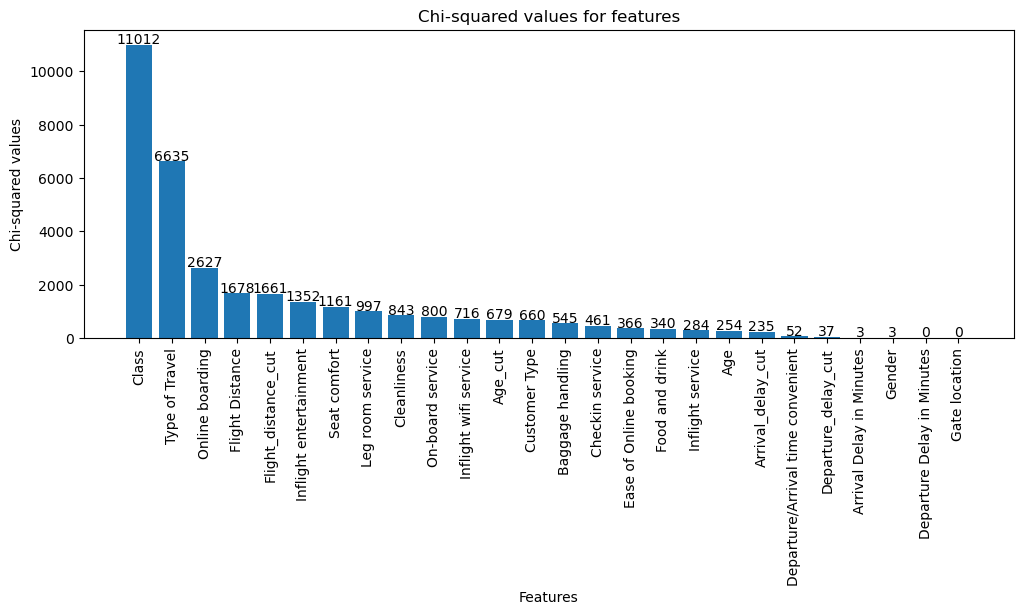

In [38]:
chi_scores = chi_scores.sort_values(by='chi_values', ascending=False)

plt.figure(figsize=(12, 4))
plt.bar(chi_scores.index, chi_scores['chi_values'])

plt.xlabel('Features')
plt.ylabel('Chi-squared values')
plt.title('Chi-squared values for features')
plt.xticks(rotation='vertical', ha='center')

for ind, val in enumerate(chi_scores['chi_values']):
    plt.text(x=int(ind), y=val+40, s=int(val), ha='center')

plt.show()

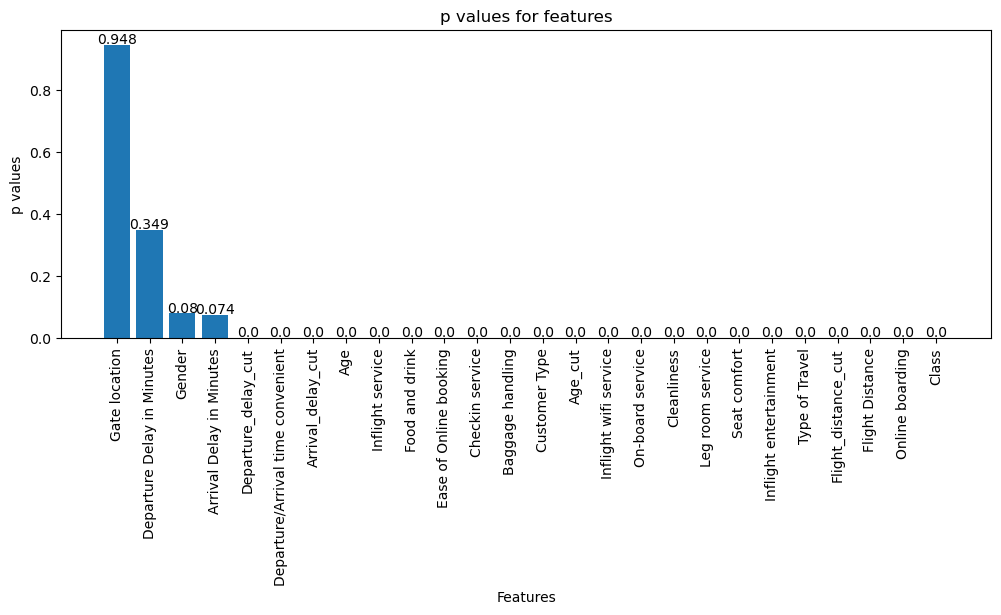

In [39]:
chi_scores = chi_scores.sort_values(by='p_values', ascending=False)

plt.figure(figsize=(12, 4))
plt.bar(chi_scores.index, chi_scores['p_values'])

plt.xlabel('Features')
plt.ylabel('p values')
plt.title('p values for features')
plt.xticks(rotation='vertical', ha='center')

for ind, val in enumerate(chi_scores['p_values']):
    plt.text(x=int(ind), y=val+0.003, s=round(val, 3), ha='center')

plt.show()

### Mutual information

I use mutual information to determine the importance of the features.

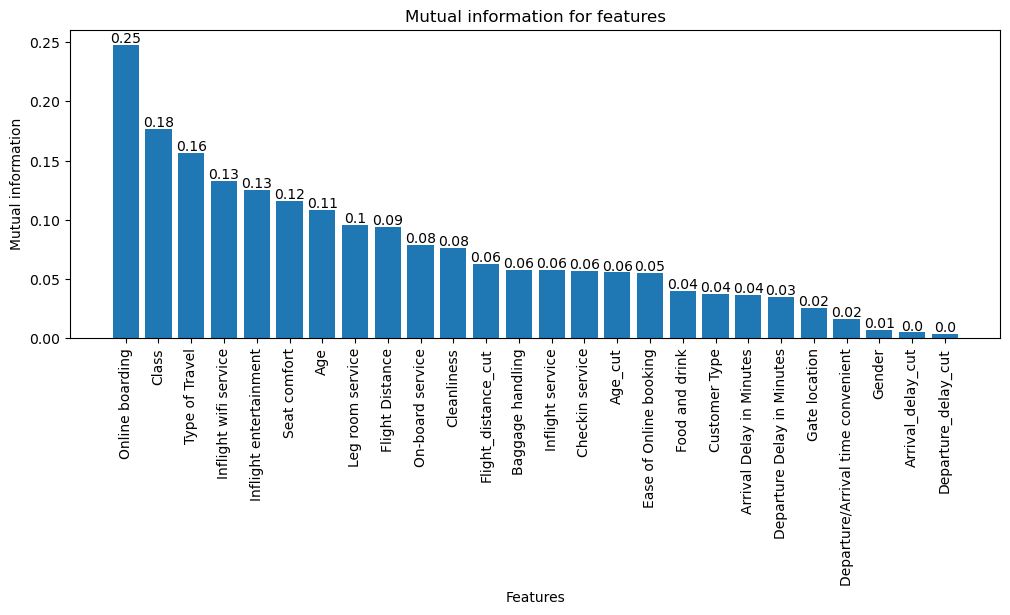

In [40]:
mutual_info = mutual_info_classif(x_train, y_train.values.ravel())

mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info = mutual_info.sort_values(ascending=False)

plt.figure(figsize=(12, 4))
plt.bar(mutual_info.index, mutual_info)

plt.xlabel('Features')
plt.ylabel('Mutual information')
plt.title('Mutual information for features')
plt.xticks(rotation='vertical', ha='center')

for ind, val in enumerate(mutual_info):
    plt.text(x=int(ind), y=val+0.002, s=round(val, 2), ha='center')

plt.show()

### Select best features

Looking at the results of both tests, I notice that for both, the features:
* Online boarding
* Class
* Type of Travel
* Inflight entertainment
* Seat comfort

are in the top positions. Therefore, I select these 5 features to continue the analysis.

In [41]:
x_train_sel = x_train[['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'Leg room service', 'Inflight wifi service']]
x_test_sel = x_test[['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort', 'Leg room service', 'Inflight wifi service']]

x_train_sel.shape, x_test_sel.shape

((90058, 7), (25976, 7))

## Model on selected features

### Spot-Check

Defined 3 models
>logistic: 0.860 (+/-0.019)
>knn: 0.916 (+/-0.021)
>rf: 0.931 (+/-0.011)

Rank=1, Name=rf, Score=0.931 (+/-0.011)
Rank=2, Name=knn, Score=0.916 (+/-0.021)
Rank=3, Name=logistic, Score=0.860 (+/-0.019)


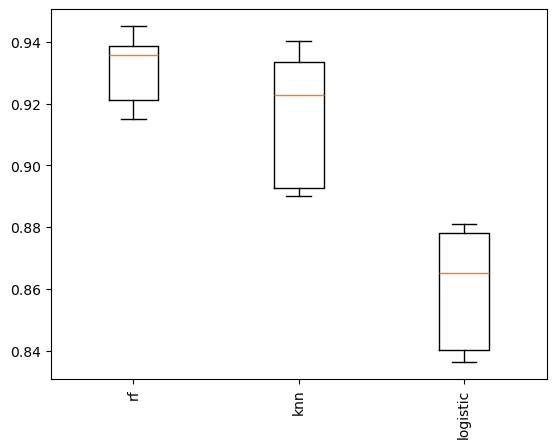

In [42]:
models = define_models()

results = evaluate_models(x_train_sel, y_train, models)

summarize_results(results)

The Random Forest model achieves the best result, so I continue the analysis with an ensemble model.

Given the excellent result obtained by the Random Forest model in the Spot Check, I decide to continue the analysis using this model.

### Model tuning

I use Random Search on the same parameters I used previously.

In [43]:
param_grid = [{
    'n_estimators' : np.arange(100, 301, 20),
    'min_samples_split' : np.arange(2, 6, 1),
    'min_samples_leaf' : np.arange(1, 6, 1),
    'max_depth' : np.arange(10, 51, 10)
}]

optimal_params = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                                    param_grid,
                                    n_iter=100,
                                    cv=5,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    random_state=0)

optimal_params.fit(x_train_sel, y_train.values.ravel())

print(optimal_params.best_params_)

print(optimal_params.best_score_)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40}
0.9314999014901113


### Model testing

RF model accuracy on test set: 0.93525


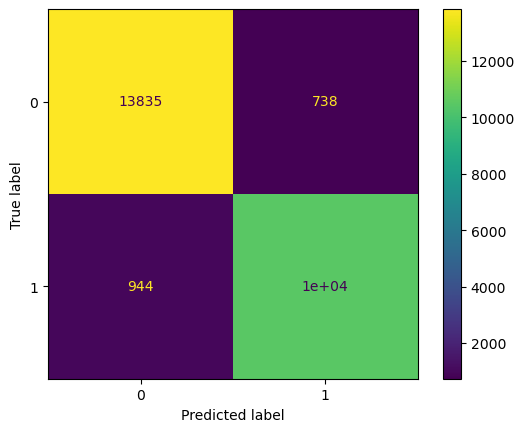

In [44]:
rf = RandomForestClassifier(n_estimators=300,
                           min_samples_split=5,
                           min_samples_leaf=1,
                           max_depth=40,
                           random_state=0)

rf.fit(x_train_sel, y_train)

predictions = rf.predict(x_test_sel)

score = accuracy_score(predictions, y_test)
print('RF model accuracy on test set: {:.5f}'.format(score))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The model achieves an accuracy of 93.53%, with 94.94% on the 'Neutral or dissatisfied' class, which is the majority class, and 91.37% on the 'Satisfied' class.

## Model optimization

So I've seen that the best-performing model is the one that uses all the features, but I can still optimize it. Therefore, I use Recursive Feature Elimination with the model and parameters chosen earlier to try to reduce the number of features.

### Recursive Feature Elimination

In [45]:
rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=4,
    min_samples_leaf=1,
    max_depth=40,
    random_state=0
)

selector = RFECV(estimator=rf, cv=5, step=1)
selector.fit(x_train, y_train.values.ravel())

selected_features = x_train.columns[selector.support_]

selected_features

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [46]:
x_train_sel = x_train[selected_features]
x_test_sel = x_test[selected_features]

x_train_sel.shape, x_test_sel.shape

((90058, 17), (25976, 17))

### Model testing

RF model accuracy on test set: 0.96289


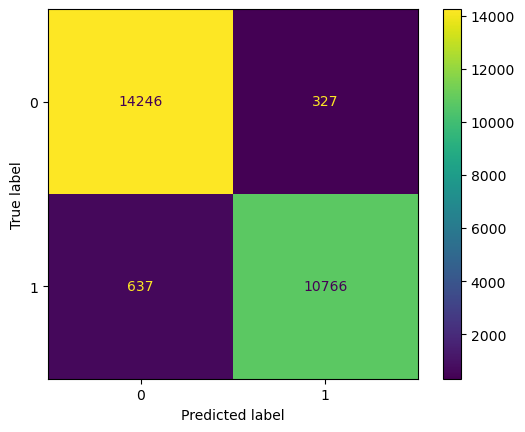

In [47]:
rf.fit(x_train_sel, y_train)

predictions = rf.predict(x_test_sel)

score = accuracy_score(predictions, y_test)
print('RF model accuracy on test set: {:.5f}'.format(score))
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

So, after Recursive Feature Elimination, the model achieves an accuracy of 96.29%, with 97.78% on the 'Neutral or dissatisfied' class, which is the majority class, and 94.38% on the 'Satisfied' class.

Therefore, the model not only uses fewer features but also achieves better results.

## Conclusion

The dataset used in this analysis was collected through a survey sent to the airline's customers, so the data is not entirely precise, as it can vary based on some unmeasurable factors such as:
* Customer's mental state: a tired or frustrated customer might give very different responses from a cheerful and relaxed customer.
* Customer's expectations: a customer with high expectations might be more critical compared to a customer with lower expectations.

Therefore, the accuracy of 96.29% achieved by the final model, although not perfect, is an excellent result.